In [2]:
#Create a BeautifulSoup Object from the link given above
#Find all the "Kategorier"

import bs4
import requests

request = requests.get('https://www.dba.dk/', headers={'User-Agent': 'Mozilla/5.0'})
request.raise_for_status()
soup = bs4.BeautifulSoup(request.text, 'html.parser')
elems = soup.select('li.single')

for elem in elems:
    print(elem.text)


 
Biler


 
Camping


 
Biltilbehør


 
Boliger


 
Have og byg


 
Til boligen


 
Til børn


 
Tøj og mode


 
Sport og fritid


 
Både


 
Cykler


 
Hobby


 
Computer og spillekonsoller


 
Mobil og telefoni


 
Dyr


 
Billede og lyd


 
Musikinstrumenter


 
Motorcykler og tilbehør


 
Scootere og knallerter


 
Diverse


 
Erhverv


 
Job


 
Ferie


 
Billetter


 
Bøger og blade



Vis alle kategorier




In [2]:
#Find all the links
for link in soup.find_all('a'):
    if not str(link.get('href')).startswith('https'):
        continue
    print(link.get('href'))

https://www.dba.dk/
https://guide.dba.dk
https://support.dba.dk/
https://www.dba.dk/opret-annonce/
https://support.dba.dk/
https://info.dba.dk/kontakt/
https://jobs.ebayclassifiedsgroup.com/dba
https://dba.presscloud.com/nr/#/
https://guide.dba.dk
https://sikkerhed.dba.dk/
https://info.dba.dk/vilkaar/brugervilkaar
https://info.dba.dk/vilkaar/annonceringsregler
https://info.dba.dk/vilkaar/persondatapolitik
https://boost.dba.dk
https://www.bilbasen.dk
https://www.dba.dk/
https://da-dk.facebook.com/dba.dk
https://twitter.com/dba_dk


In [3]:
#Use selenium to press the "Kategory" link with the name "biler"
from selenium import webdriver
from selenium.webdriver.firefox.options import Options

options = Options()
options.headless = True
browser = webdriver.Firefox(options=options)

browser.get('https://www.dba.dk/')
browser.implicitly_wait(3)

link_to_persons = browser.find_elements_by_link_text('Biler')
link_to_persons[0].click()
print(link_to_persons)

[<selenium.webdriver.firefox.webelement.FirefoxWebElement (session="922a89c6-38d6-498e-88bd-039562c05cb1", element="ff8499d6-5a50-495f-b28d-6050975f1922")>]


{'Grønland ': 1, 'Bornholm ': 18, 'Aalborg ': 636, 'Odense ': 765, 'Aarhus ': 954, 'Fyn ': 2182, 'København og omegn ': 5304, 'Sjælland ': 13190, 'Jylland ': 15746}


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

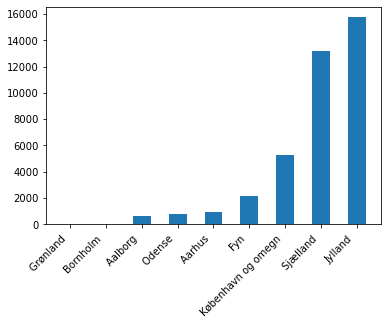

In [4]:
import matplotlib.pyplot as plt
request = requests.get('https://www.dba.dk/biler', headers={'User-Agent': 'Mozilla/5.0'})
request.raise_for_status()
soup = bs4.BeautifulSoup(request.text, 'html.parser')



all_cars = soup.select('nav.row-fluid small')
all_cars.pop(0);
all_cars.pop(8)

all_cities = soup.select('nav.row-fluid a')
city_array = []
for city in all_cities:
    city_array.append(city.text.split("(")[0])


car_array = []


for car in all_cars:
    car_array.append(car.text.split("(")[1].split(")")[0])

res = {city_array[i]: int(car_array[i]) for i in range(len(city_array))} 
sorted_res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
print(sorted_res)

plt.bar(sorted_res.keys(),sorted_res.values(),width=0.5, align='center')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
